In [9]:
import os
import numpy as np

import torch
from torch.utils.data import DataLoader

from segment.data import AAPM
from segment.data.utils import train_valid_split

import matplotlib.pyplot as plt

%matplotlib notebook

In [10]:
PATH = '/home/ygx/data/aapm17/permuted'

In [48]:
aapm = AAPM(PATH, 'bone')
trainset, testset = train_valid_split(aapm, valpercent=.5)

aapm.tissue
aapm.tissue_map[aapm.tissue]

3

In [49]:
loader = DataLoader(aapm, 1)

In [70]:
for idx, (img, mask) in enumerate(loader):
    print(f'Image: {img.shape}, Mask: {mask.shape}')
#     if idx == 3:
#         break

tissue map: 3
Image: torch.Size([1, 122, 512, 512]), Mask: torch.Size([1, 122, 512, 512])
tissue map: 3
Image: torch.Size([1, 134, 512, 512]), Mask: torch.Size([1, 134, 512, 512])
tissue map: 3
Image: torch.Size([1, 140, 512, 512]), Mask: torch.Size([1, 140, 512, 512])
tissue map: 3
Image: torch.Size([1, 152, 512, 512]), Mask: torch.Size([1, 152, 512, 512])
tissue map: 3
Image: torch.Size([1, 144, 512, 512]), Mask: torch.Size([1, 144, 512, 512])
tissue map: 3
Image: torch.Size([1, 148, 512, 512]), Mask: torch.Size([1, 148, 512, 512])
tissue map: 3
Image: torch.Size([1, 136, 512, 512]), Mask: torch.Size([1, 136, 512, 512])
tissue map: 3
Image: torch.Size([1, 161, 512, 512]), Mask: torch.Size([1, 161, 512, 512])
tissue map: 3
Image: torch.Size([1, 168, 512, 512]), Mask: torch.Size([1, 168, 512, 512])
tissue map: 3
Image: torch.Size([1, 160, 512, 512]), Mask: torch.Size([1, 160, 512, 512])
tissue map: 3
Image: torch.Size([1, 133, 512, 512]), Mask: torch.Size([1, 133, 512, 512])
tissue map

In [71]:
def remove_keymap_conflicts(new_keys_set):
    for prop in plt.rcParams:
        if prop.startswith('keymap.'):
            keys = plt.rcParams[prop]
            remove_list = set(keys) & new_keys_set
            for key in remove_list:
                keys.remove(key)

def multi_slice_viewer(volume):
    remove_keymap_conflicts({'j', 'k'})
    fig, ax = plt.subplots()
    ax.volume = volume
    ax.index = volume.shape[0] // 2
    ax.imshow(volume[ax.index])
    fig.canvas.mpl_connect('key_press_event', process_key)

def process_key(event):
    fig = event.canvas.figure
    ax = fig.axes[0]
    if event.key == 'j':
        previous_slice(ax)
    elif event.key == 'k':
        next_slice(ax)
    fig.canvas.draw()

def previous_slice(ax):
    volume = ax.volume
    ax.index = (ax.index - 1) % volume.shape[0]  # wrap around using %
    ax.images[0].set_array(volume[ax.index])

def next_slice(ax):
    volume = ax.volume
    ax.index = (ax.index + 1) % volume.shape[0]
    ax.images[0].set_array(volume[ax.index])

In [72]:
mask = mask.squeeze(0)
img = img.squeeze(0)

<IPython.core.display.Javascript object>


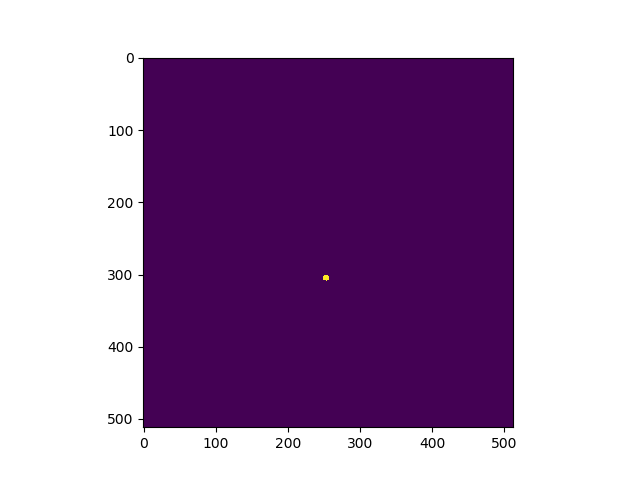

In [73]:
multi_slice_viewer(mask)

In [10]:
def unique(tensor1d):
    t, idx = np.unique(tensor1d.numpy(), return_inverse=True)
    return torch.from_numpy(t), torch.from_numpy(idx)  

In [11]:
unique(mask)

(tensor([0., 1., 2., 3., 4., 5.]), tensor([0, 0, 0,  ..., 0, 0, 0]))

In [29]:
def single_mask(mask, idx):
    return mask == idx

In [30]:
mask_zero = single_mask(0)
mask_one = single_mask(1)
mask_two = single_mask(2)
mask_three = single_mask(3)
mask_four = single_mask(4)
mask_five = single_mask(5)